In [1]:
import tensorflow.keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout, Conv2D, BatchNormalization, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dty

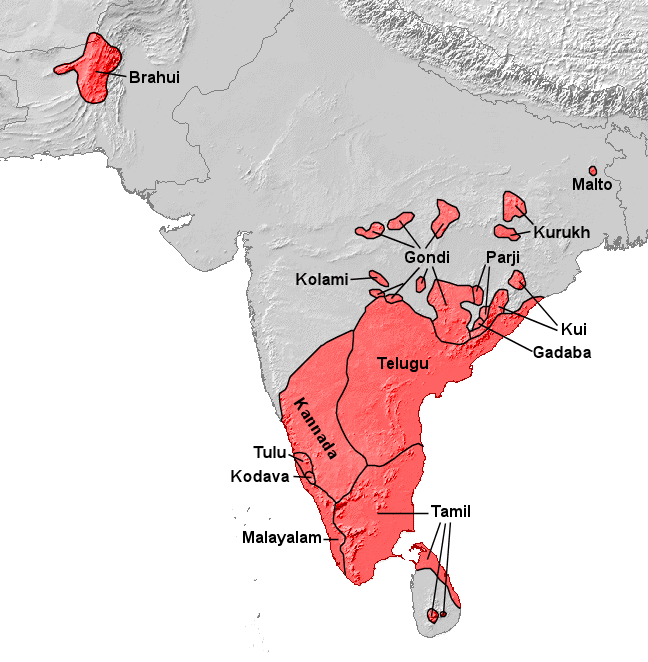

In [2]:
dravidian_lang = image.load_img('Dravidische_Sprachen.png')
dravidian_lang

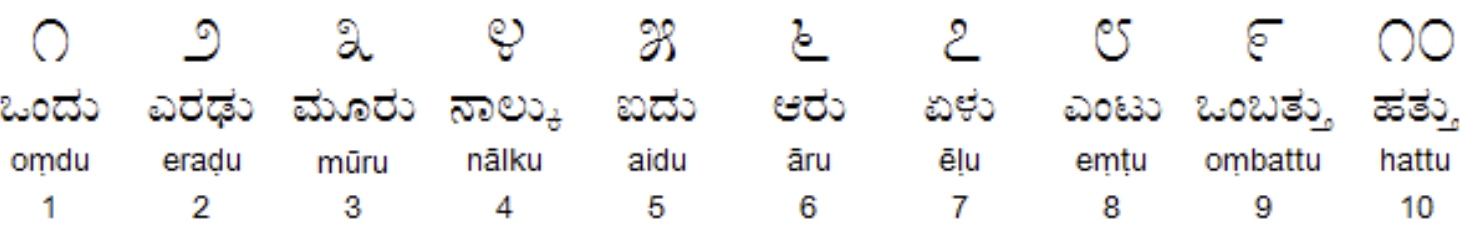

In [3]:
img = image.load_img('kannada_mnist.png')
img

In [4]:
# loading kannada data
train_kn = pd.read_csv('kannada_mnist_train.csv')
test_kn = pd.read_csv('kannada_mnist_test.csv')

In [5]:
train_kn.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
xtrain_kn = train_kn.iloc[:, 1:].values.astype('float32') / 255
ytrain_kn = train_kn.iloc[:, 0] # labels

In [7]:
xtest_kn = test_kn.iloc[:, 1:].values.astype('float32') / 255
ytest_kn = test_kn.iloc[:, 0] # labels

In [8]:
xtrain_kn = xtrain_kn.reshape(60000, 28*28)
ytrain_kn = tensorflow.keras.utils.to_categorical(ytrain_kn,dtype='float32')
xtest_kn = xtest_kn.reshape(5000, 28*28)
ytest_kn = tensorflow.keras.utils.to_categorical(ytest_kn,dtype='float32')

In [9]:
xtrain_kn.shape, xtest_kn.shape

((60000, 784), (5000, 784))

In [10]:
ytrain_kn.shape, ytest_kn.shape # whats with ytest_kn labels? will sort it out later

((60000, 10), (5000, 5000))

In [11]:
# load english data
(xtrain_en, ytrain_en), (xtest_en, ytest_en) = mnist.load_data()

In [12]:
xtrain_en.shape, xtest_en.shape

((60000, 28, 28), (10000, 28, 28))

In [13]:
xtrain_en = xtrain_en / 255.0
xtest_en = xtest_en / 255.0

In [14]:
xtrain_en = xtrain_en.astype(np.float32)
xtrain_en = xtrain_en.reshape(60000, 28*28)
ytrain_en = tensorflow.keras.utils.to_categorical(ytrain_en,num_classes=10, dtype='float32')
xtrain_en.shape, ytrain_en.shape

((60000, 784), (60000, 10))

In [15]:
xtest_en = xtest_en.astype(np.float32)
xtest_en = xtest_en.reshape(10000, 28*28)
ytest_en = tensorflow.keras.utils.to_categorical(ytest_en,num_classes=10, dtype='float32')
xtest_en.shape, ytest_en.shape

((10000, 784), (10000, 10))

In [16]:
K.clear_session()
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', mode = 'min', patience=10)

In [17]:
# define the model
model = Sequential([
      Dense(20, input_shape=(784,)), # 100 neurons in first layer, with shape of X input being (784,)
      BatchNormalization(),
      Activation('relu'),      
      Dropout(0.05),
      Dense(15),
      BatchNormalization(),
      Activation('relu'),    
      Dropout(0.05),  
      Dense(10),
      BatchNormalization(),
      Activation('softmax')
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                15700     
_________________________________________________________________
batch_normalization_v1 (Batc (None, 20)                80        
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 15)                60        
_________________________________________________________________
activation_1 (Activation)    (None, 15)                0         
__________

In [19]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# fit the model
history_en = model.fit(xtrain_en, ytrain_en, batch_size=20000, epochs=300, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
48000/48000 [==============================] - 2s 40us/sample - loss: 2.6841 - acc: 0.1109 - val_loss: 2.2475 - val_acc: 0.1445
Epoch 2/300
48000/48000 [==============================] - 0s 10us/sample - loss: 2.2534 - acc: 0.2199 - val_loss: 2.1816 - val_acc: 0.2412
Epoch 3/300
48000/48000 [==============================] - 0s 10us/sample - loss: 1.9721 - acc: 0.3274 - val_loss: 2.1285 - val_acc: 0.3381
Epoch 4/300
48000/48000 [==============================] - 0s 9us/sample - loss: 1.7874 - acc: 0.4146 - val_loss: 2.0873 - val_acc: 0.3997
Epoch 5/300
48000/48000 [==============================] - 0s 10us/sample - loss: 1.6656 - acc: 0.4777 - val_loss: 2.0535 - val_acc: 0.4410
Epoch 6/300
48000/48000 [==============================] - 0s 10us/sample - loss: 1.5738 - acc: 0.5273 - val_loss: 2.0231 - val_acc: 0.4740
Epoch 7/300
48000/48000 [==============================] - 0s 9

48000/48000 [==============================] - 1s 16us/sample - loss: 0.6599 - acc: 0.8751 - val_loss: 0.8493 - val_acc: 0.9137
Epoch 58/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.6544 - acc: 0.8765 - val_loss: 0.8365 - val_acc: 0.9147
Epoch 59/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.6502 - acc: 0.8774 - val_loss: 0.8234 - val_acc: 0.9158
Epoch 60/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.6459 - acc: 0.8788 - val_loss: 0.8101 - val_acc: 0.9162
Epoch 61/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.6381 - acc: 0.8801 - val_loss: 0.7978 - val_acc: 0.9172
Epoch 62/300
48000/48000 [==============================] - 0s 9us/sample - loss: 0.6355 - acc: 0.8802 - val_loss: 0.7862 - val_acc: 0.9178
Epoch 63/300
48000/48000 [==============================] - 0s 9us/sample - loss: 0.6315 - acc: 0.8810 - val_loss: 0.7760 - val_acc: 0.9184
Epoch 64/300
48000/48000 [==

Epoch 173/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3879 - acc: 0.9230 - val_loss: 0.3923 - val_acc: 0.9408
Epoch 174/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3874 - acc: 0.9240 - val_loss: 0.3904 - val_acc: 0.9412
Epoch 175/300
48000/48000 [==============================] - 1s 12us/sample - loss: 0.3865 - acc: 0.9241 - val_loss: 0.3885 - val_acc: 0.9412
Epoch 176/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3832 - acc: 0.9226 - val_loss: 0.3870 - val_acc: 0.9404
Epoch 177/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3838 - acc: 0.9237 - val_loss: 0.3852 - val_acc: 0.9411
Epoch 178/300
48000/48000 [==============================] - 1s 13us/sample - loss: 0.3821 - acc: 0.9236 - val_loss: 0.3841 - val_acc: 0.9413
Epoch 179/300
48000/48000 [==============================] - 1s 18us/sample - loss: 0.3783 - acc: 0.9258 - val_loss: 0.3829 - val_acc: 0.9415
Epoch 

Epoch 231/300
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3270 - acc: 0.9334 - val_loss: 0.3345 - val_acc: 0.9455
Epoch 232/300
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3262 - acc: 0.9331 - val_loss: 0.3332 - val_acc: 0.9459
Epoch 233/300
48000/48000 [==============================] - 0s 9us/sample - loss: 0.3258 - acc: 0.9333 - val_loss: 0.3323 - val_acc: 0.9459
Epoch 234/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3237 - acc: 0.9323 - val_loss: 0.3307 - val_acc: 0.9463
Epoch 235/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3231 - acc: 0.9348 - val_loss: 0.3293 - val_acc: 0.9467
Epoch 236/300
48000/48000 [==============================] - 1s 11us/sample - loss: 0.3223 - acc: 0.9339 - val_loss: 0.3272 - val_acc: 0.9459
Epoch 237/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.3184 - acc: 0.9350 - val_loss: 0.3257 - val_acc: 0.9460
Epoch 2

Epoch 289/300
48000/48000 [==============================] - 1s 12us/sample - loss: 0.2762 - acc: 0.9427 - val_loss: 0.2903 - val_acc: 0.9489
Epoch 290/300
48000/48000 [==============================] - 1s 13us/sample - loss: 0.2782 - acc: 0.9403 - val_loss: 0.2920 - val_acc: 0.9489
Epoch 291/300
48000/48000 [==============================] - 0s 10us/sample - loss: 0.2762 - acc: 0.9427 - val_loss: 0.2922 - val_acc: 0.9490
Epoch 292/300
48000/48000 [==============================] - 1s 13us/sample - loss: 0.2772 - acc: 0.9418 - val_loss: 0.2909 - val_acc: 0.9494
Epoch 293/300
48000/48000 [==============================] - 0s 9us/sample - loss: 0.2753 - acc: 0.9419 - val_loss: 0.2890 - val_acc: 0.9498
Epoch 294/300
48000/48000 [==============================] - 0s 9us/sample - loss: 0.2752 - acc: 0.9421 - val_loss: 0.2872 - val_acc: 0.9499
Epoch 295/300
48000/48000 [==============================] - 1s 11us/sample - loss: 0.2738 - acc: 0.9425 - val_loss: 0.2861 - val_acc: 0.9507
Epoch 29

In [21]:
model.evaluate(xtrain_en, ytrain_en)

60000/60000 [==============================] - 3s 44us/sample - loss: 0.2550 - acc: 0.9607


[0.25503278903166454, 0.96066666]

In [22]:
model.evaluate(xtest_en, ytest_en)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.2803 - acc: 0.9468


[0.28029592967033384, 0.9468]

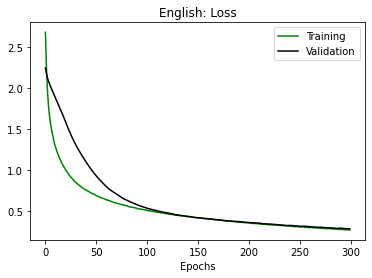

In [23]:
loss = history_en.history['loss']
val_loss = history_en.history['val_loss']
epochs = range(0,len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('English: Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

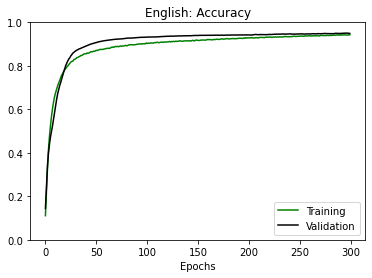

In [24]:
accuracy = history_en.history['acc']
val_accuracy = history_en.history['val_acc']
epochs = range(0,len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('English: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0, 1)
plt.legend()
plt.show()

### Freeze layers

In [25]:
model.layers[0].trainable = False  
model.layers[1].trainable = False  
model.layers[2].trainable = False  
model.layers[3].trainable = False  
model.layers[4].trainable = False  
model.layers[5].trainable = False  
model.layers[6].trainable = False  
model.layers[7].trainable = False  
model.layers[8].trainable = False  
model.layers[9].trainable = False  
model.layers[10].trainable = False  

In [26]:
# fit model to kannada mnist

In [27]:
history_kn = model.fit(xtrain_kn, ytrain_kn, batch_size=20000, epochs=300, 
                   validation_split=0.2, callbacks=[callback])

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 [==============================] - 2s 38us/sample - loss: 2.9841 - acc: 0.2580 - val_loss: 1.9429 - val_acc: 0.3788
Epoch 2/300
48000/48000 [==============================] - 2s 42us/sample - loss: 1.7952 - acc: 0.4682 - val_loss: 1.1749 - val_acc: 0.6022
Epoch 3/300
48000/48000 [==============================] - 2s 42us/sample - loss: 1.1401 - acc: 0.6400 - val_loss: 0.7302 - val_acc: 0.7734
Epoch 4/300
48000/48000 [==============================] - 2s 44us/sample - loss: 0.8021 - acc: 0.7560 - val_loss: 0.5000 - val_acc: 0.8622
Epoch 5/300
48000/48000 [==============================] - 2s 43us/sample - loss: 0.6327 - acc: 0.8236 - val_loss: 0.4040 - val_acc: 0.8892
Epoch 6/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.5543 - acc: 0.8541 - val_loss: 0.3573 - val_acc: 0.9010
Epoch 7/300
48000/48000 [==============================] - 2s 39us/sample - loss: 0.5064 - acc: 0.8723 - val_l

48000/48000 [==============================] - 2s 44us/sample - loss: 0.1827 - acc: 0.9636 - val_loss: 0.1416 - val_acc: 0.9731
Epoch 116/300
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1811 - acc: 0.9648 - val_loss: 0.1413 - val_acc: 0.9732
Epoch 117/300
48000/48000 [==============================] - 2s 40us/sample - loss: 0.1774 - acc: 0.9651 - val_loss: 0.1410 - val_acc: 0.9733
Epoch 118/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1808 - acc: 0.9638 - val_loss: 0.1405 - val_acc: 0.9733
Epoch 119/300
48000/48000 [==============================] - 1s 30us/sample - loss: 0.1791 - acc: 0.9647 - val_loss: 0.1400 - val_acc: 0.9734
Epoch 120/300
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1790 - acc: 0.9643 - val_loss: 0.1394 - val_acc: 0.9737
Epoch 121/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1788 - acc: 0.9653 - val_loss: 0.1389 - val_acc: 0.9738
Epoch 122/300
48000/

Epoch 173/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1519 - acc: 0.9700 - val_loss: 0.1281 - val_acc: 0.9733
Epoch 174/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1515 - acc: 0.9700 - val_loss: 0.1280 - val_acc: 0.9736
Epoch 175/300
48000/48000 [==============================] - 2s 40us/sample - loss: 0.1512 - acc: 0.9705 - val_loss: 0.1276 - val_acc: 0.9739
Epoch 176/300
48000/48000 [==============================] - 2s 40us/sample - loss: 0.1503 - acc: 0.9705 - val_loss: 0.1273 - val_acc: 0.9741
Epoch 177/300
48000/48000 [==============================] - 3s 53us/sample - loss: 0.1508 - acc: 0.9697 - val_loss: 0.1271 - val_acc: 0.9741
Epoch 178/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1516 - acc: 0.9697 - val_loss: 0.1268 - val_acc: 0.9737
Epoch 179/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1478 - acc: 0.9706 - val_loss: 0.1265 - val_acc: 0.9737
Epoch 

Epoch 231/300
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1311 - acc: 0.9743 - val_loss: 0.1192 - val_acc: 0.9743
Epoch 232/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1321 - acc: 0.9740 - val_loss: 0.1193 - val_acc: 0.9743
Epoch 233/300
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1315 - acc: 0.9737 - val_loss: 0.1191 - val_acc: 0.9743
Epoch 234/300
48000/48000 [==============================] - 2s 37us/sample - loss: 0.1310 - acc: 0.9748 - val_loss: 0.1188 - val_acc: 0.9745
Epoch 235/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1301 - acc: 0.9749 - val_loss: 0.1187 - val_acc: 0.9744
Epoch 236/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1316 - acc: 0.9738 - val_loss: 0.1185 - val_acc: 0.9746
Epoch 237/300
48000/48000 [==============================] - 2s 43us/sample - loss: 0.1294 - acc: 0.9751 - val_loss: 0.1182 - val_acc: 0.9743
Epoch 

Epoch 289/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1166 - acc: 0.9769 - val_loss: 0.1146 - val_acc: 0.9742
Epoch 290/300
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1164 - acc: 0.9768 - val_loss: 0.1143 - val_acc: 0.9743
Epoch 291/300
48000/48000 [==============================] - 2s 38us/sample - loss: 0.1153 - acc: 0.9771 - val_loss: 0.1139 - val_acc: 0.9743
Epoch 292/300
48000/48000 [==============================] - 2s 39us/sample - loss: 0.1143 - acc: 0.9782 - val_loss: 0.1136 - val_acc: 0.9744
Epoch 293/300
48000/48000 [==============================] - 2s 32us/sample - loss: 0.1142 - acc: 0.9774 - val_loss: 0.1139 - val_acc: 0.9743
Epoch 294/300
48000/48000 [==============================] - 2s 44us/sample - loss: 0.1148 - acc: 0.9777 - val_loss: 0.1142 - val_acc: 0.9745
Epoch 295/300
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1134 - acc: 0.9781 - val_loss: 0.1143 - val_acc: 0.9746
Epoch 

In [28]:
model.evaluate(xtrain_kn, ytrain_kn)

60000/60000 [==============================] - 3s 44us/sample - loss: 0.0916 - acc: 0.98420s - los


[0.09159499260485172, 0.9842333]

In [29]:
#model.evaluate(xtest_kn, ytest_kn)

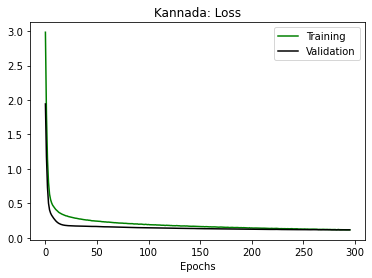

In [30]:
loss = history_kn.history['loss']
val_loss = history_kn.history['val_loss']
epochs = range(0,len(loss))
plt.plot(epochs, loss, 'g', label='Training')
plt.plot(epochs, val_loss, 'k', label='Validation')
plt.title('Kannada: Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

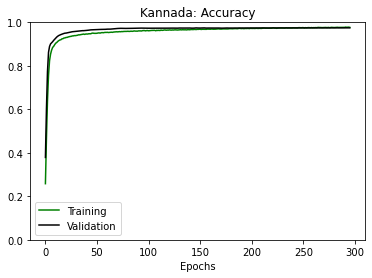

In [31]:
accuracy = history_kn.history['acc']
val_accuracy = history_kn.history['val_acc']
epochs = range(0,len(accuracy))
plt.plot(epochs, accuracy, 'g', label='Training')
plt.plot(epochs, val_accuracy, 'k', label='Validation')
plt.title('Kannada: Accuracy')
plt.xlabel('Epochs')
plt.ylim(0, 1)
plt.legend()
plt.show()